<a href="https://colab.research.google.com/github/MATNAT93/Music-Genre-Recognition/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
              precision    recall  f1-score   support

       blues       0.60      0.86      0.71        14
   classical       0.85      0.92      0.88        12
     country       0.45      0.39      0.42        23
       disco       0.38      0.45      0.42        22
      hiphop       0.52      0.48      0.50        23
        jazz       0.45      0.75      0.56        12
       metal       0.65      0.62      0.63        21
         pop       0.64      0.61      0.62        23
      reggae       0.57      0.62      0.59        21
        rock       0.46      0.22      0.30        27

    accuracy                           0.55       198
   macro avg       0.56      0.59      0.56       198
weighted avg       0.54      0.55      0.53       198



Text(0.5, 1.0, 'Importance des caractéristiques')

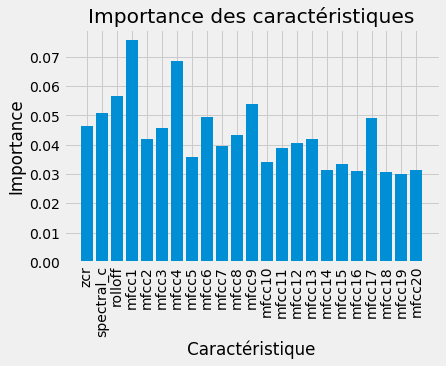

In [18]:
import pandas as pd 
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv('/content/drive/My Drive/data_python/données.csv')

# On split le dataset pour pouvoir entrainer le modèle par la suite
X_train, X_test, y_train, y_test = train_test_split(df[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                                                        'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                                                        'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 
                                                        'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']],df['genre'], test_size=0.2, random_state=0)
#Fit du training set
rf = RandomForestClassifier(n_estimators=2000,max_depth=20, random_state=0)
rf.fit(X_train, y_train)

# Prediction sur le Test set
y_pred = rf.predict(X_test)

#Vérification de la qualité du modèle
print(classification_report(y_test, y_pred))

#sklearn.metrics.plot_confusion_matrix(rf, X_test, y_test) # Matrice de confusion

column_names = ['genre','zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

importances = list(rf.feature_importances_)
plt.bar(column_names[1:], importances, orientation = 'vertical')
plt.xticks(column_names[1:], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Caractéristique'); plt.title('Importance des caractéristiques')
